# DA Final project:

# Group 5

# Shark Attack

###  Name of students:
Ohad Rosenson<br>
Yoav Yekutiel<br>



<a id='top'></a>

<div>
<img src="https://raw.githubusercontent.com/YoavYekutiel/Project-attacks/main/shark-swimming-water-1200x800.webp" width="500"/>
<div>


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Information of the data
The target of our project is to find details that affect shark attacks on people and to minimize these attacks. <br>taken from [Kaggle](https://www.kaggle.com/datasets/felipeesc/shark-attack-dataset)


In [49]:
url1 = 'https://raw.githubusercontent.com/YoavYekutiel/Project-attacks/main/sharck_attack_part_2UPD.csv'#כשפיצלנו את הקובץ , לאחר הפיצול נשארו בקובץ המון שורות ריקות ולכן יצרנו משתנה חדש שבו מצויות רק שורות עם נתונים
df = pd.read_csv(url1)
shark_df2 = df.iloc[:2809]
url2 = 'https://raw.githubusercontent.com/YoavYekutiel/Project-attacks/main/sharck_attack_part_1UPD.csv'
shark_df1 = pd.read_csv(url2)
shark_df = pd.concat([shark_df1 ,shark_df2]).reset_index()#כעת נחבר את הקבצים, מאחר ואנחנו רוצים לעבוד באותו סדר שבו עבדו בקובץ , נרצה שההתחלה של הקובץ יהיו השנים המעודכנות ואילו בסוף יהיו השנים המאוחרות
shark_df.shape

(6309, 25)

In [51]:
shark_df.columns


Index(['index', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)',
       'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula',
       'href', 'Case Number.1', 'Case Number.2', 'original order',
       'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [52]:
shark_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6309 entries, 0 to 6308
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   6309 non-null   int64  
 1   Case Number             6308 non-null   object 
 2   Date                    6302 non-null   object 
 3   Year                    6300 non-null   float64
 4   Type                    6298 non-null   object 
 5   Country                 6252 non-null   object 
 6   Area                    5847 non-null   object 
 7   Location                5762 non-null   object 
 8   Activity                5758 non-null   object 
 9   Name                    6092 non-null   object 
 10  Sex                     5737 non-null   object 
 11  Age                     3471 non-null   object 
 12  Injury                  6274 non-null   object 
 13  Fatal (Y/N)             5763 non-null   object 
 14  Time                    2948 non-null   

# Arranging the columns:

We arrange the data for each column: we removed values that are not relevant, connected columns with the same meaning and created new columns that are relevant.

In [324]:
counts_of_each_activity = shark_df['Activity'].value_counts() #סידור מחדש עבור activity
frequent_activities = counts_of_each_activity[counts_of_each_activity >= 50].index
shark_df['Frequent_Activity'] = shark_df['Activity'].apply(lambda x: x if x in frequent_activities else pd.NA) # יצירת עמודה חדשה שבה מצויים כלל הפעילויות שמופיעות מעל 50 פעם בdata
shark_df['Frequent_Activity'].unique()
shark_df['Frequent_Activity'] = shark_df['Frequent_Activity'].replace({'Scuba diving': 'Diving','Snorkeling': 'Diving'}) #איחוד המשתנים כך שכל סוגי הצלילה ייכנסו תחת הקבוצה של הצלילה הכולל
shark_df['Frequent_Activity'] = shark_df['Frequent_Activity'].replace({'Spearfishing':'Fishing'})
shark_df['Frequent_Activity'] = shark_df['Frequent_Activity'].replace({'Body boarding':'Surfing'})
shark_df['Frequent_Activity'].unique()

array([<NA>, 'Standing', 'Surfing', 'Swimming', 'Fishing', 'Diving',
       'Wading', 'Bathing'], dtype=object)

In [141]:
counts_of_species= shark_df['Species '].value_counts() # סידור עמודת Species
frequent_species = counts_of_species[counts_of_species >= 10].index
shark_df['Species'] = shark_df['Species '].apply(lambda x: x if x in frequent_species else pd.NA)
shark_df['Species'] = shark_df['Species'].apply(lambda x: 'Shark involvement not confirmed' if pd.notnull(x) and 'confirmed' in x else x)
shark_df['Species'] = shark_df['Species'].apply(lambda x: 'white shark' if pd.notnull(x) and 'hite' in x else x)
shark_df['Species'] = shark_df['Species'].replace({"Questionable":"Questionable incident"})
shark_df['Species'].unique()

array(['white shark', <NA>, '2 m shark', 'Tiger shark',
       'Shark involvement not confirmed', 'Questionable incident',
       '3 m shark', "6' shark", 'Bull shark', 'Wobbegong shark',
       'Blacktip shark', "5' shark", "4' to 5' shark", 'Nurse shark',
       "4' shark", "3' shark", "10' shark", "3' to 4' shark", 'Invalid',
       'Blue shark', 'Mako shark', 'No shark involvement', '1.5 m shark',
       "7' shark", 'Grey nurse shark', 'Raggedtooth shark',
       'Zambesi shark', 'Bronze whaler shark', '"a small shark"',
       "12' shark", "1.8 m [6'] shark", "3 m [10'] shark",
       "2.4 m [8'] shark", "1.2 m [4'] shark",
       "1.2 m to 1.5 m [4' to 5'] shark", "1.5 m [5'] shark",
       "3.7 m [12'] shark"], dtype=object)

In [64]:
shark_df['Fatal (Y/N)'] = shark_df['Fatal (Y/N)'].replace({" N":"N","y":"Y"}) # סידור fatal 
counts_of_fatal_incident = shark_df["Fatal (Y/N)"].value_counts()
fatal_incident = counts_of_fatal_incident[counts_of_fatal_incident >= 10].index
fatal_incident
shark_df['fatal_incident'] = shark_df['Fatal (Y/N)'].apply(lambda x: x if x in fatal_incident else pd.NA)
shark_df['fatal_incident'] = shark_df['fatal_incident'].replace('UNKNOWN', pd.NA)

shark_df['fatal_incident'].unique()

array(['N', 'Y', <NA>], dtype=object)

In [76]:
shark_df['Sex'] = shark_df['Sex '].replace('M ', 'M')
shark_df['Sex'] = shark_df['Sex '].map({'M':'M','F':'F'})
shark_df['Sex'].unique()

array(['F', 'M', nan], dtype=object)

In [70]:
top_15 = shark_df['Country'].value_counts().head(15)
shark_df['Top_Country'] = shark_df['Country'].apply(lambda x: x if x in top_15.index else None)
shark_df['Top_Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', None, 'SOUTH AFRICA',
       'BAHAMAS', 'NEW CALEDONIA', 'CUBA', 'NEW ZEALAND', 'REUNION',
       'PHILIPPINES', 'MOZAMBIQUE', 'FIJI', 'ITALY', 'PAPUA NEW GUINEA'],
      dtype=object)

In [222]:
shark_df['D_Time'] = shark_df['Time'].str.replace('h', ':', regex=False)
shark_df['D_Time'] = pd.to_datetime(shark_df['D_Time'], format='%H:%M', errors='coerce')
shark_df['Time_Category'] = pd.cut(shark_df['D_Time'].dt.hour, bins=[0, 12, 18, 24], labels=['Morning', 'Noon', 'evening'], right=False)
shark_df['Time_Category'] .unique()

['evening', NaN, 'Morning', 'Noon']
Categories (3, object): ['Morning' < 'Noon' < 'evening']

In [80]:
shark_df['Injury_Types'] = shark_df['Injury'].apply(lambda x: 'bite' if pd.notnull(x) and 'bit' in x else ('No injury' if pd.notnull(x) and 'No injury' in x else x))
top_Injury= shark_df['Injury_Types'].value_counts().head(20).index
shark_df['Top_Injury'] = shark_df['Injury_Types'].apply(lambda x: x if x in top_Injury else 'NON')
shark_df['Top_Injury'].unique()


array(['No injury', 'NON', 'bite', 'FATAL', 'Lacerations to left foot',
       'Minor injuries', 'Lacerations to right foot',
       'Lacerations to foot', 'Leg injured', 'Laceration to left foot',
       'Lacerations to right hand', 'Lacerations to leg', 'Minor injury',
       'No details', 'Leg severed', 'Survived', 'Foot severed',
       'Foot lacerated', 'FATAL, leg severed ',
       'FATAL, body not recovered', 'Leg lacerated'], dtype=object)

In [175]:

shark_df['Date'] = pd.to_datetime(shark_df['Date'], errors='coerce')
shark_df['Month'] = shark_df['Date'].dt.month
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
shark_df['Month'] = shark_df['Month'].map(month_map)
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
shark_df['Month'] = pd.Categorical(shark_df['Month'], categories=months_order, ordered=True)
shark_df['Month'].unique()


['June', 'May', NaN, 'April', 'March', ..., 'November', 'October', 'September', 'August', 'July']
Length: 13
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']

In [137]:
shark_df['Age'] = pd.to_numeric(shark_df['Age'], errors='coerce')
shark_df['age_bins'] = pd.cut(shark_df['Age'], bins = 3, labels = ('young', 'middle_age', 'old' ))
shark_df['age_bins'].value_counts()

age_bins
young         2189
middle_age    1065
old            115
Name: count, dtype: int64

In [285]:
Total_Year = shark_df[shark_df['Year']> 1950]
shark_df['Top_Year'] = Total_Year['Year']
shark_df['Top_Year'].value_counts()


Top_Year
2015.0    143
2017.0    136
2016.0    130
2011.0    128
2014.0    127
         ... 
1971.0     28
1973.0     27
1977.0     26
1979.0     25
1978.0     25
Name: count, Length: 68, dtype: int64

In [179]:
shark_df.columns

Index(['index', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)',
       'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula',
       'href', 'Case Number.1', 'Case Number.2', 'original order',
       'Unnamed: 22', 'Unnamed: 23', 'Species', 'fatal_incident', 'Sex',
       'Top_Country', 'Injury_Types', 'Top_Injury', 'Month', 'age_bins',
       'Frequent_Activity'],
      dtype='object')

## General information that the data shows

In this part, we show the basic information of the data before we start the process:
We can see that 80 percent of those attacked are male and 10 percent are female the remaining 10 percent are unknown.
In addition, more than 20 percent of the attacks are fatal and the median age attakcked is 27-28 years old.

Text(0.5, 0, '')

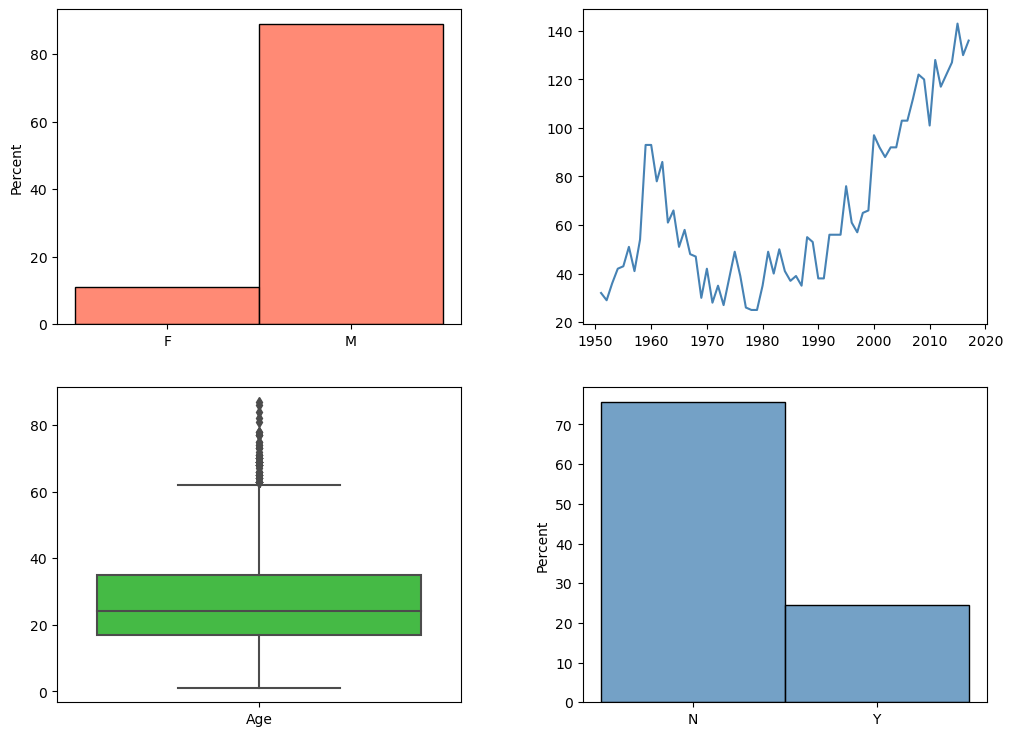

In [345]:
fig, ax = plt.subplots(2,2, figsize = (12,9))
plt.subplots_adjust(wspace = 0.3)
attack_counts = shark_df['Top_Year'].value_counts().sort_index()
attack_counts = attack_counts[attack_counts.index <= 2017]
sns.histplot(data=shark_df, x ='Sex',stat = 'percent',ax = ax[0,0],color='#FF6347')
ax[0,0].set_xlabel(' ')
sns.lineplot(x=attack_counts.index, y=attack_counts.values, ax = ax[0,1],color='#4682B4')
ax[0,1].set_xlabel('')
sns.boxplot(data = shark_df[['Age']], ax = ax[1,0],color='#32CD32')
sns.histplot(data = shark_df , x = 'fatal_incident',stat = 'percent',color = '#4682B4',ax = ax[1,1])
ax[1,1].set_xlabel('')


### First Conclusion:

We want to find when and where the fatal attack occur and for each group

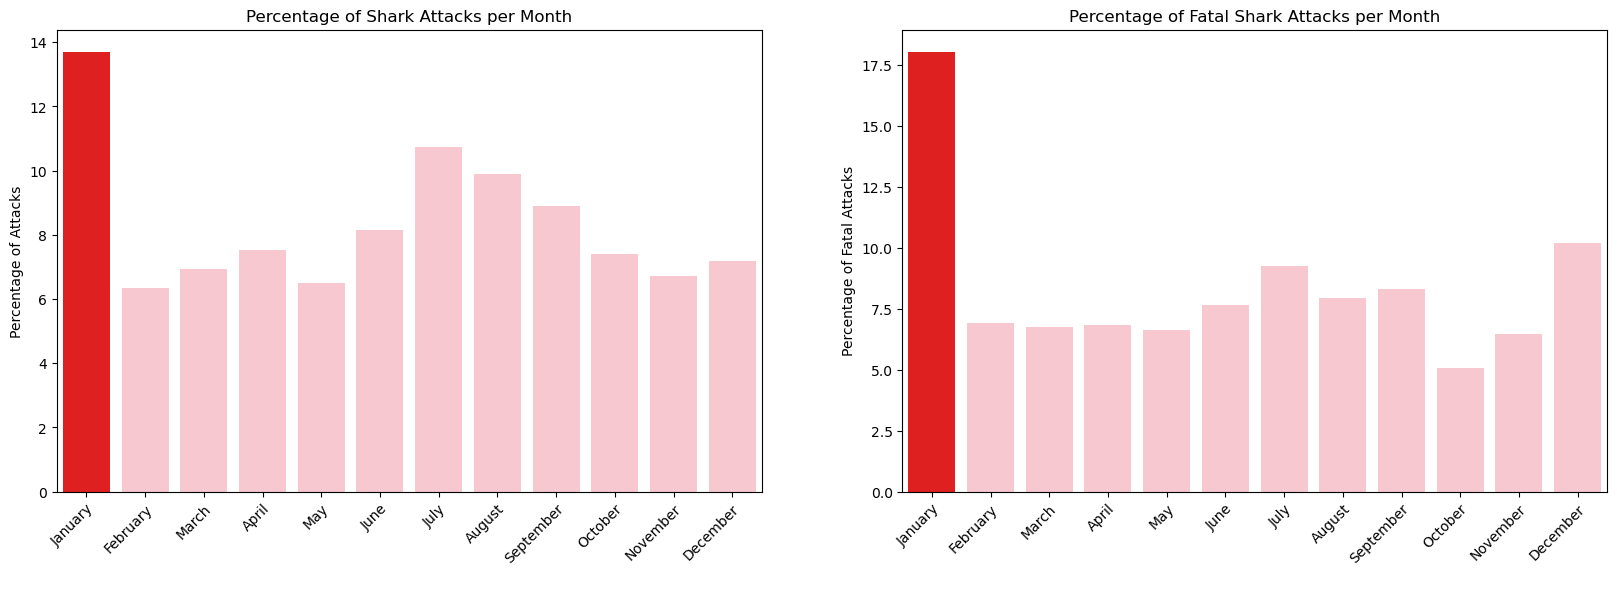

In [268]:

attack_counts = shark_df.groupby('Month').size()
attack_percentages = (attack_counts / attack_counts.sum()) * 100
attack_percentages = attack_percentages.reindex(months_order)

fatal_counts = shark_df[shark_df['Fatal (Y/N)'] == 'Y'].groupby('Month').size()
fatal_percentages = (fatal_counts / fatal_counts.sum()) * 100
fatal_percentages = fatal_percentages.reindex(months_order)

colors_attack = ['red' if month == 'January' else 'pink' for month in attack_percentages.index]
colors_fatal = ['red' if month == 'January' else 'pink' for month in fatal_percentages.index]

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.subplots_adjust(wspace=0.2)

sns.barplot(x=attack_percentages.index, y=attack_percentages.values, palette=colors_attack, ax=ax[0])
ax[0].set_title('Percentage of Shark Attacks per Month')
ax[0].set_xlabel(' ')
ax[0].set_ylabel('Percentage of Attacks')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

sns.barplot(x=fatal_percentages.index, y=fatal_percentages.values, palette=colors_fatal, ax=ax[1])
ax[1].set_title('Percentage of Fatal Shark Attacks per Month')
ax[1].set_xlabel(' ')
ax[1].set_ylabel('Percentage of Fatal Attacks')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

plt.show()


In [29]:
shark_df['Top_Country'].value_counts()

Top_Country
USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                89
ITALY                 71
FIJI                  62
PHILIPPINES           61
REUNION               60
NEW CALEDONIA         53
CUBA                  46
MOZAMBIQUE            45
Name: count, dtype: int64

In [30]:
shark_df['Location'].value_counts()

Location
New Smyrna Beach, Volusia County                  163
Daytona Beach, Volusia County                      30
Ponce Inlet, Volusia County                        20
Melbourne Beach, Brevard County                    18
Myrtle Beach, Horry County                         17
                                                 ... 
Whale Beach                                         1
l'Anse-Vata                                         1
Hole-in-the Wall                                    1
Wreck of the Navy Barge, 22 miles SE of Rudee       1
Below the English fort, Trincomalee                 1
Name: count, Length: 4108, dtype: int64

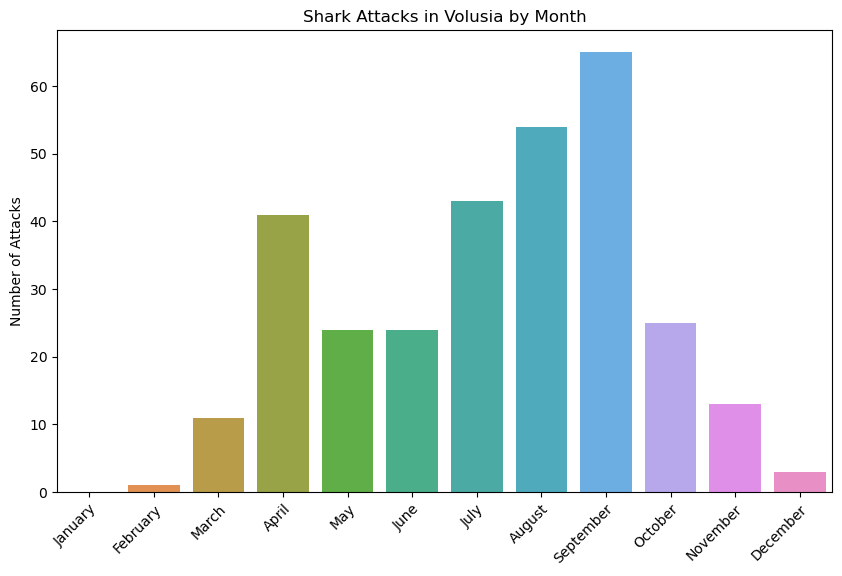

In [386]:
filtered_data = shark_df[shark_df['Location'].str.contains('Volusia', na=False)]

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=filtered_data, x='Month', ax=ax)

# כותרות לצירים ולגרף
ax.set_title('Shark Attacks in Volusia by Month')
ax.set_xlabel('')
ax.set_ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor' )
# הצגת הגרף
plt.show()

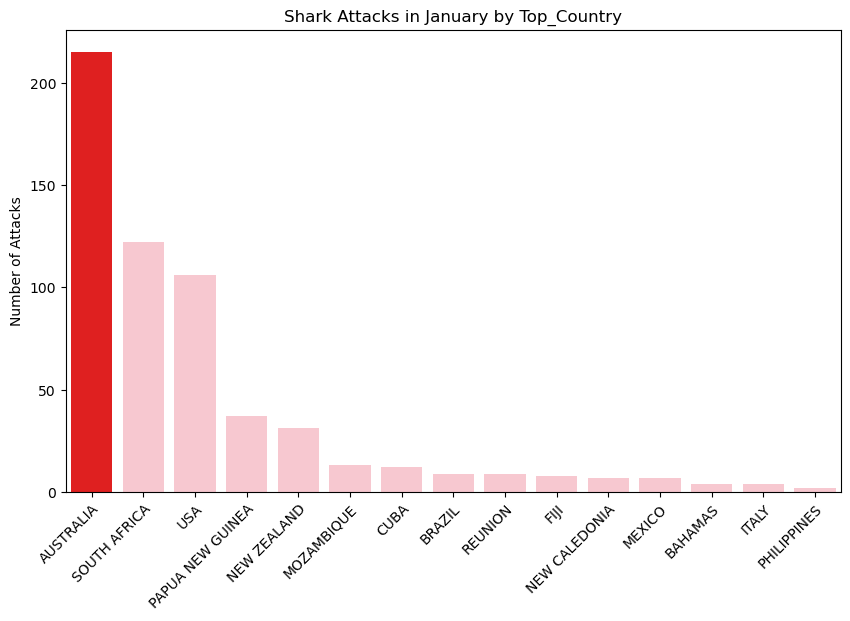

In [388]:
filtered_data = shark_df[shark_df['Month']== 'January']

most_common_Country_January= filtered_data['Top_Country'].value_counts().idxmax()

# הגדרת סדר העמודות לפי הפעילויות
order_count = filtered_data['Top_Country'].value_counts().index

# יצירת רשימת צבעים שבה כל הצבעים הם כחול, חוץ מהצבע של הפעילות עם הספירה הגבוהה ביותר שיהיה אדום
colors = ['pink' if country != most_common_Country_January else 'red' for country in order_count]

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=filtered_data, x='Top_Country', order = order_count,palette = colors)
ax.set_title('Shark Attacks in January by Top_Country')
ax.set_xlabel('')
ax.set_ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor' )
plt.show()

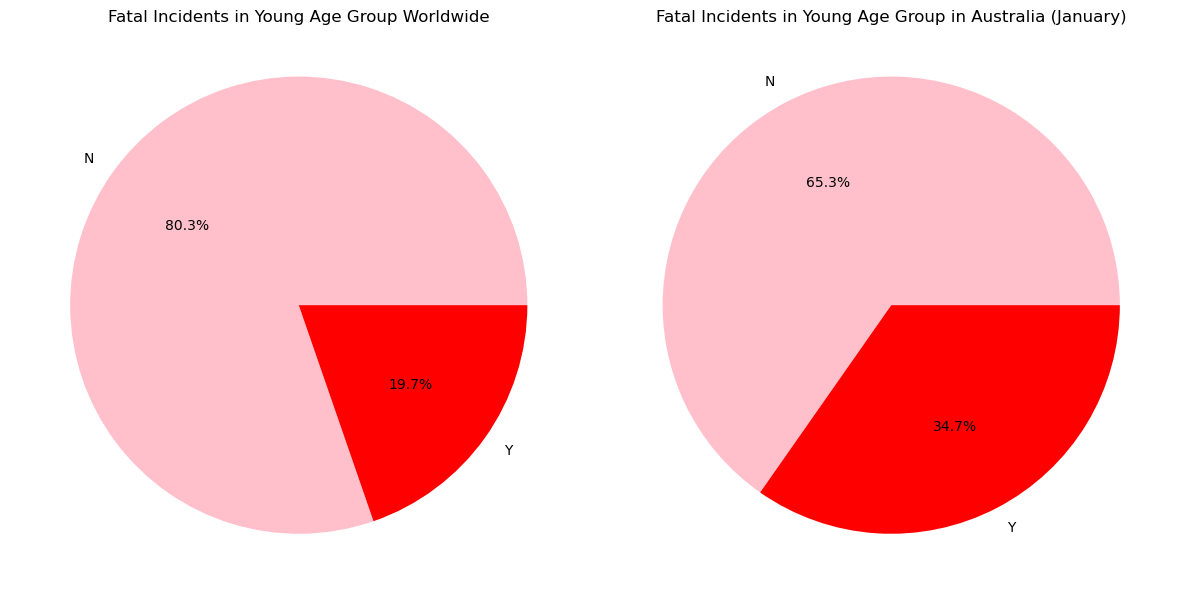

In [327]:
fatal_percent_worldwide = shark_df[shark_df['age_bins'] == 'young']['fatal_incident'].value_counts(normalize=True) * 100

# סינון לפי YOUNG, אוסטרליה וינואר וחישוב אחוז ה-FATAL
fatal_percent_australia_jan = shark_df[(shark_df['age_bins'] == 'young') &
                                       (shark_df['Top_Country'] == 'AUSTRALIA') &
                                       (shark_df['Month'] == 'January')]['fatal_incident'].value_counts(normalize=True) * 100

# יצירת תמונה עם שני גרפים פיאי
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# גרף פיאי ראשון: אחוז התקריות הקטלניות בקבוצת הגיל YOUNG בעולם
ax[0].pie(fatal_percent_worldwide, labels=fatal_percent_worldwide.index, autopct='%1.1f%%', colors=['pink', 'red'])
ax[0].set_title('Fatal Incidents in Young Age Group Worldwide')
ax[0].axis('equal')  # להפוך לעגלה

# גרף פיאי שני: אחוז התקריות הקטלניות בקבוצת הגיל YOUNG באוסטרליה בינואר
ax[1].pie(fatal_percent_australia_jan, labels=fatal_percent_australia_jan.index, autopct='%1.1f%%', colors=['pink', 'red'])
ax[1].set_title('Fatal Incidents in Young Age Group in Australia (January)')
ax[1].axis('equal')  # להפוך לעגלה

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Frequent Activities in Young Age Group')

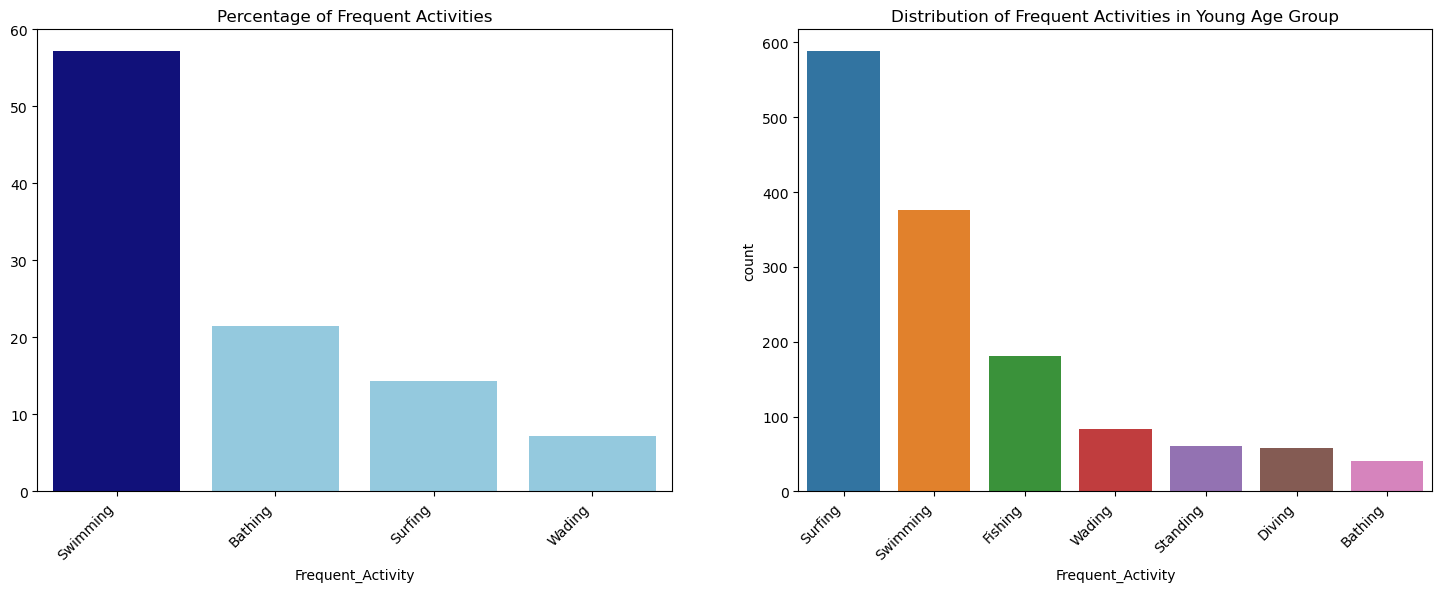

In [350]:
young_fatal_january_aus = shark_df[(shark_df['age_bins'] == 'young') & 
                                    (shark_df['fatal_incident'] == 'Y') & 
                                    (shark_df['Month'] == 'January') & 
                                    (shark_df['Top_Country'] == 'AUSTRALIA')]
total = len(young_fatal_january_aus)
percentages = young_fatal_january_aus['Frequent_Activity'].value_counts(normalize=True) * 100

colors = ['darkblue' if i == percentages.idxmax() else 'skyblue' for i in percentages.index]
K = shark_df[shark_df['age_bins'] == 'young']


fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(x=percentages.index, y=percentages.values, palette=colors,ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
ax[0].set_title('Percentage of Frequent Activities')
sns.countplot(data=K, x='Frequent_Activity', order=K['Frequent_Activity'].value_counts().index,ax = ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
ax[1].set_title('Distribution of Frequent Activities in Young Age Group')



We can see that the most fatal month and the area where the most attacks occur is in Volusia Country, Florida. What is surprising is that despite this, there were no attacks in this area at all in the month of January. The main conclusion we reached is that when it comes to the young age group in January in Australia the most fatal attacks will occur.

### Conclusion 2:
On one hand, the activity most commonly attacked by sharks is surfing, but on the other hand, this activity has the fewest fatal incidents.

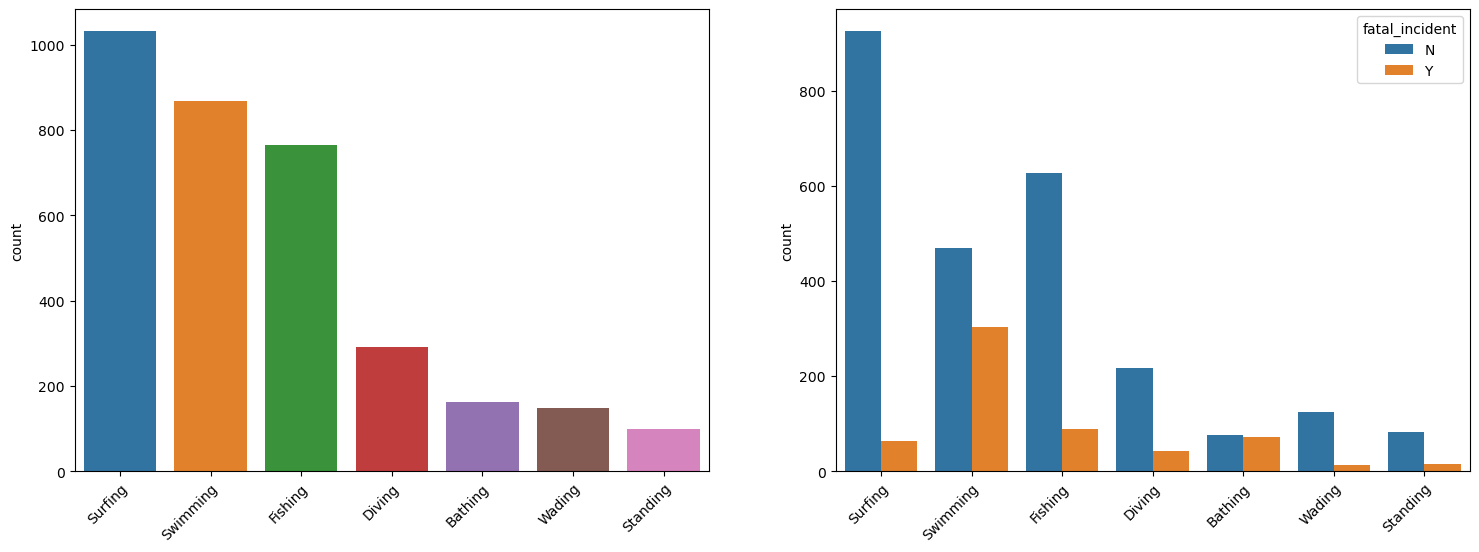

In [276]:
order_count = shark_df['Frequent_Activity'].value_counts().index
# Create figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Percentage of Shark Attacks by Activity
sns.countplot(data=shark_df, x='Frequent_Activity', order=order_count, ax=ax[0])
sns.countplot(data=shark_df, x='Frequent_Activity',hue= 'fatal_incident',ax=ax[1],order = order_count)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')   

plt.subplots_adjust(wspace=0.2)

ax[0].set_xlabel('')
ax[1].set_xlabel('')

plt.show()



<Axes: xlabel='Frequent_Activity', ylabel='Percent'>

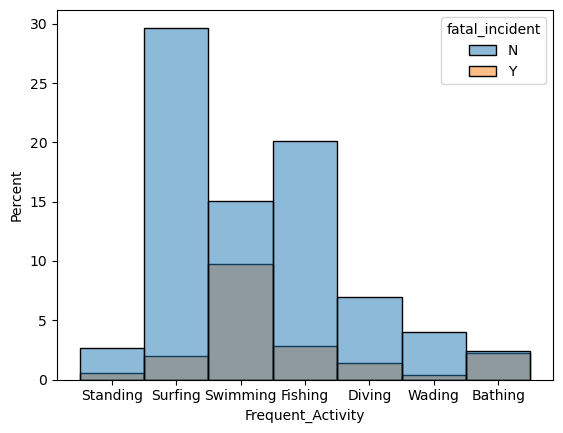

In [390]:
sns.histplot(data=shark_df, x='Frequent_Activity',hue= 'fatal_incident',stat = 'percent')


In the left countplot, it can be seen that the most common activity in shark attack cases is surfing.
However,in the right countplot, it can be observed that the percentage of fatal incidents out of all shark attack cases is the lowest for surfing compared to other types of activities where attacks occur.This raises a question! 
Additionally, it can be seen that the percentage of fatal incidents for swimming activities is the highest compared to other activities

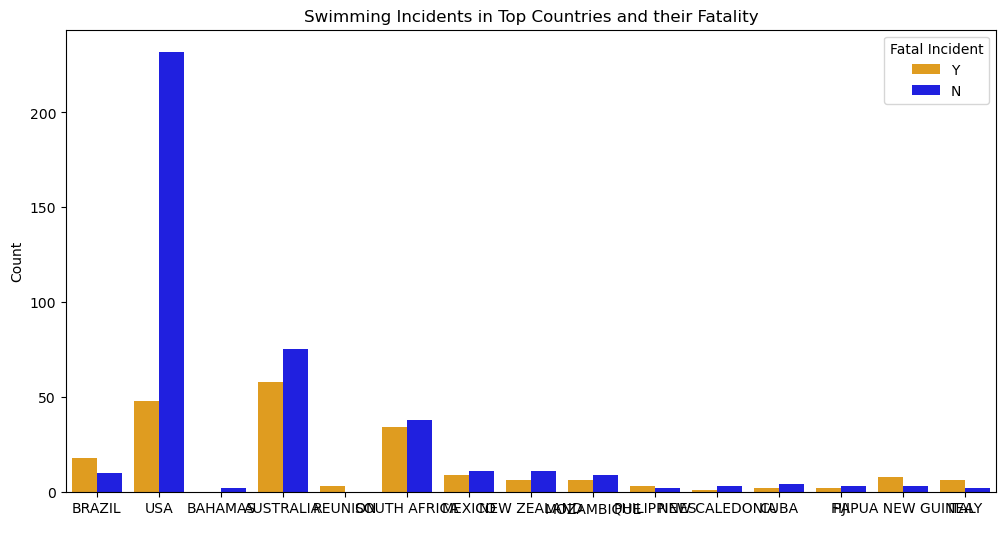

In [348]:
#sns.countplot(data=shark_df[shark_df['Frequent_Activity'] == 'Swimming'],x='Top_Country',hue='fatal_incident',palette={'Y': 'orange', 'N': 'blue'})
#plt.xticks(rotation=45, ha='right')

swimming_df = shark_df[shark_df['Frequent_Activity'] == 'Swimming']
plt.figure(figsize=(12, 6))
sns.countplot(data=swimming_df, x='Top_Country', hue='fatal_incident',palette = {'Y':'orange','N':'blue'})
plt.title('Swimming Incidents in Top Countries and their Fatality')
plt.xlabel(' ')
plt.ylabel('Count')
plt.legend(title='Fatal Incident')
plt.show()


In [228]:
Swimming_USA_df['Month'].value_counts()

Month
July         62
August       51
June         46
September    37
May          26
April        21
October      13
January       9
November      8
February      6
March         6
December      6
Name: count, dtype: int64

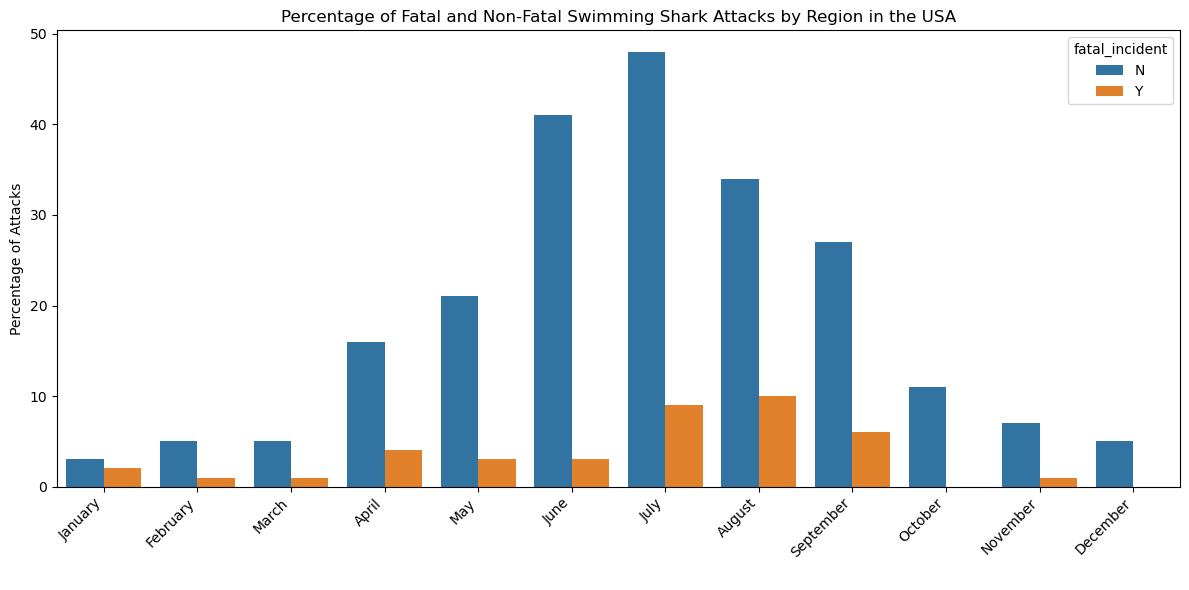

In [349]:
# סינון הנתונים לפעילות שחייה ולארה"ב בלבד
Swimming_USA_df = shark_df[(shark_df['Frequent_Activity'] == 'Swimming') & (shark_df['Top_Country'] == 'USA')]
order_time_categories = Swimming_USA_df['Month'].unique()
# Ensure order_time_categories does not contain NaNs or null values
# חישוב אחוזי התקיפות הקטלניות לכל אזור ומיון בסדר יורד
order_y = Swimming_USA_df.groupby('Time_Category')['fatal_incident'].value_counts(normalize=True).loc[:, 'Y'].sort_values(ascending=False).index

# יצירת גרף היסטוגרמה עם אחוזי התקיפות הקטלניות לפי אזור
plt.figure(figsize=(12, 6))
sns.countplot(data=Swimming_USA_df, x='Month', hue='fatal_incident')
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of Fatal and Non-Fatal Swimming Shark Attacks by Region in the USA')
plt.xlabel(' ')
plt.ylabel('Percentage of Attacks')

# הצגת הגרף
plt.tight_layout()
plt.show()

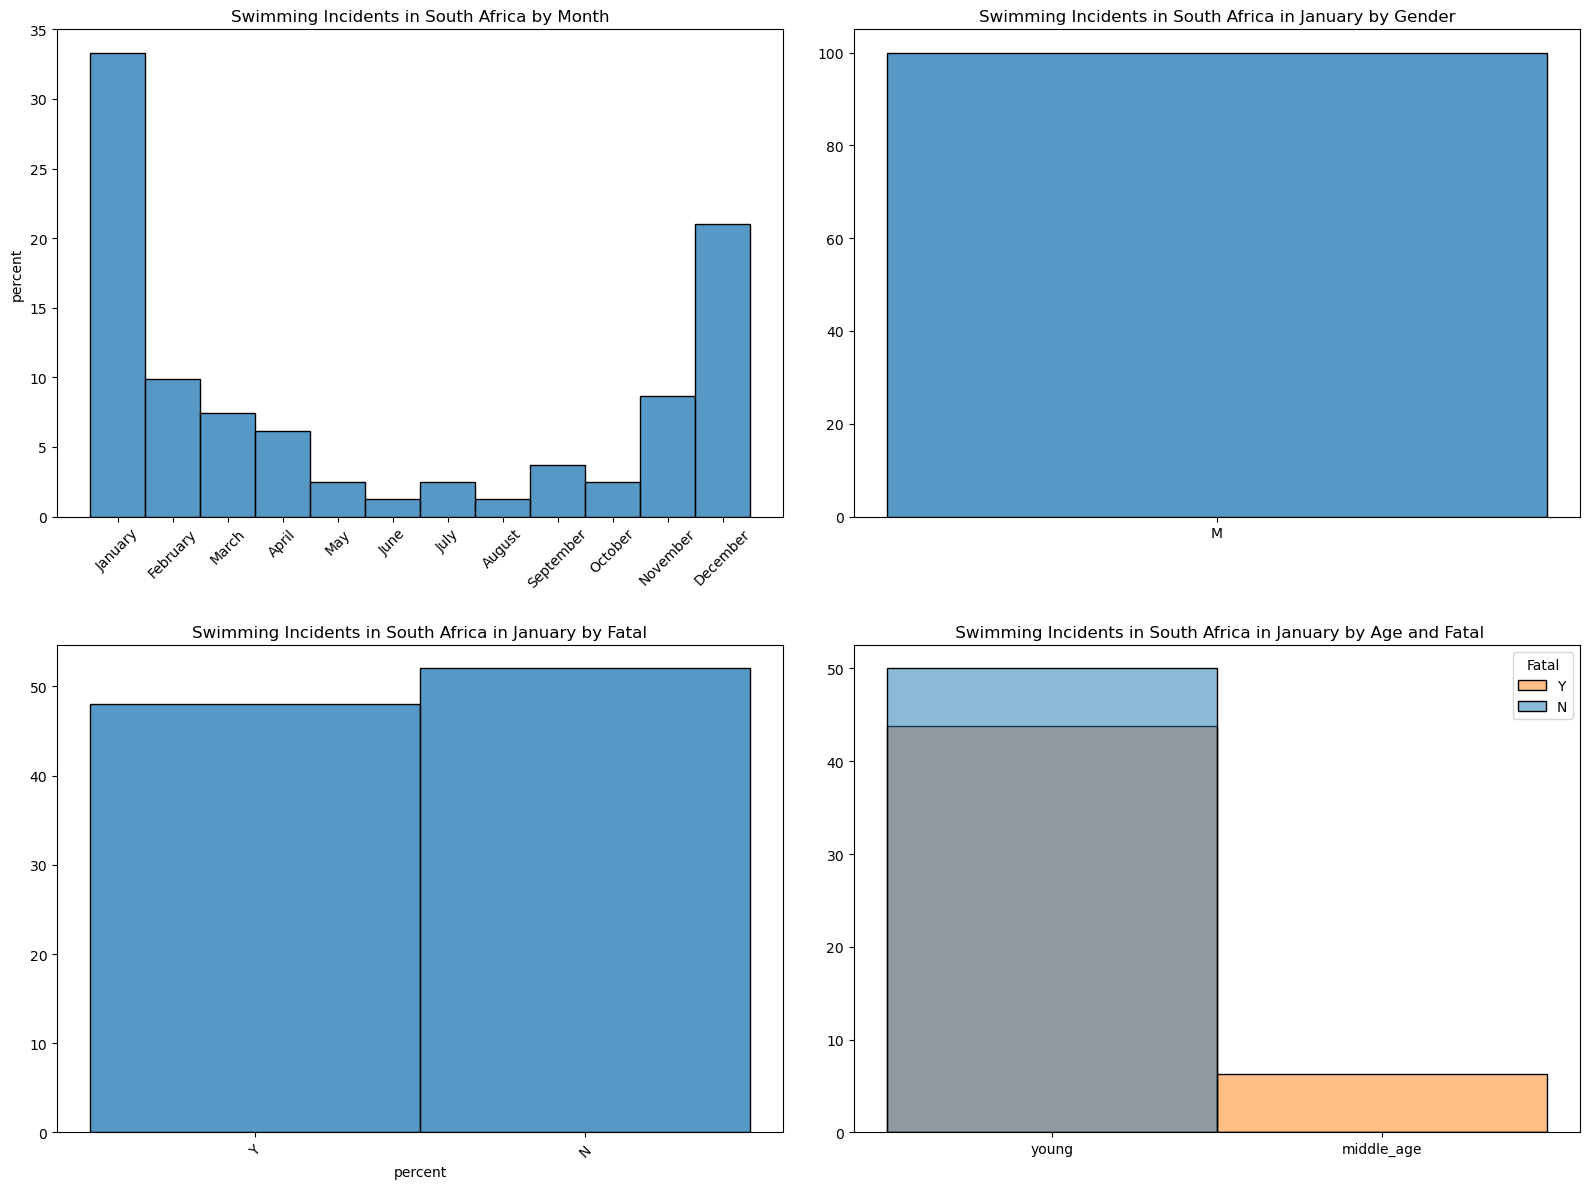

In [346]:

# סנן את הנתונים לפעילות 'Swimming' במדינה 'SOUTH AFRICA'
filtered_df1 = shark_df[(shark_df['Frequent_Activity'] == 'Swimming') &
                       (shark_df['Top_Country'] == 'SOUTH AFRICA')]

filtered_df2 = shark_df[(shark_df['Frequent_Activity'] == 'Swimming') &
                       (shark_df['Top_Country'] == 'SOUTH AFRICA') &
                       (shark_df['Month'] == 'January')]

filtered_df3 = shark_df[(shark_df['Frequent_Activity'] == 'Swimming') &
                       (shark_df['Top_Country'] == 'SOUTH AFRICA') &
                       (shark_df['Month'] == 'January')]

filtered_df4 = shark_df[(shark_df['Frequent_Activity'] == 'Swimming') &
                       (shark_df['Top_Country'] == 'SOUTH AFRICA') &
                        (shark_df['Month'] == 'January')]
                      # (shark_df['fatal_incident'] == 'Y') &
                   

# יצירת subplot עם 2 שורות ו-2 עמודות
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# גרף הראשון: Non-Fatal Swimming Incidents in South Africa by Month
sns.histplot(data=filtered_df1, x='Month', ax=axes[0, 0] ,stat = 'percent')
axes[0, 0].set_title('Swimming Incidents in South Africa by Month')
axes[0, 0].set_xlabel(' ')
axes[0, 0].set_ylabel('percent')
axes[0, 0].tick_params(axis='x', rotation=45)

# גרף השני: Non-Fatal Swimming Incidents in South Africa in January by Gender
sns.histplot(data=filtered_df2, x='Sex', ax=axes[0, 1] ,stat = 'percent')
axes[0, 1].set_title('Swimming Incidents in South Africa in January by Gender')
axes[0, 1].set_xlabel(' ')
axes[0, 1].set_ylabel(' ')

# גרף השלישי: Non-Fatal Swimming Incidents in South Africa by Month (Non-Fatal Only)
sns.histplot(data=filtered_df3, x='fatal_incident', ax=axes[1, 0] ,stat = 'percent',hue_order=['Y', 'N'])
axes[1, 0].set_title('Swimming Incidents in South Africa in January by Fatal')
axes[1, 0].set_xlabel('percent')
axes[1, 0].set_ylabel(' ')
axes[1, 0].tick_params(axis='x', rotation=45)

# גרף הרביעי: Non-Fatal Swimming Incidents in South Africa in January by Age and Gender (Fatal Only)
sns.histplot(data=filtered_df4, x='age_bins', ax=axes[1, 1], hue='fatal_incident' ,stat = 'percent')
axes[1, 1].set_title(' Swimming Incidents in South Africa in January by Age and Fatal')
axes[1, 1].set_xlabel(' ')
axes[1, 1].set_ylabel(' ')
axes[1, 1].legend(title='Fatal', labels=['Y', 'N'])

# תצוגה והצגת הגרפים
plt.tight_layout()
plt.show()



Conclusion 3

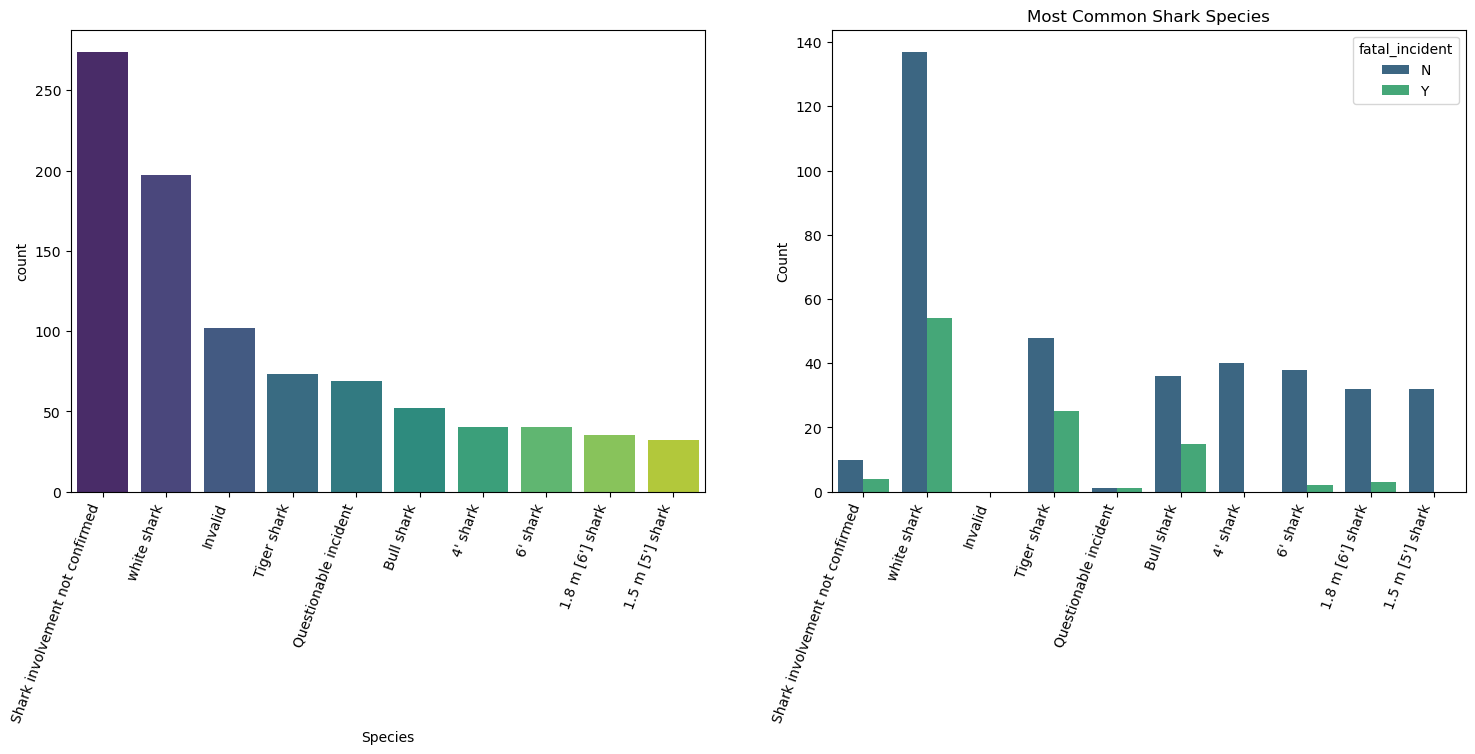

In [411]:
species_counts = shark_df['Species'].value_counts().nlargest(10)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(data=shark_df[shark_df['Species'].isin(species_counts.index)], x='Species', order=species_counts.index, palette='viridis',ax = axes[0])
sns.countplot(data=shark_df[shark_df['Species'].isin(species_counts.index)], x='Species',hue = 'fatal_incident', order=species_counts.index, palette='viridis',ax = axes[1])
plt.title('Most Common Shark Species')
plt.xlabel(' ')
plt.ylabel('Count')
axes[0].tick_params(axis='x', rotation=70)
axes[1].tick_params(axis='x', rotation=70)
for tick in axes[0].get_xticklabels():
    tick.set_horizontalalignment('right')
    tick.set_x(tick.get_position()[0] - 0.05)
for tick in axes[1].get_xticklabels():
    tick.set_horizontalalignment('right')
    tick.set_x(tick.get_position()[0] - 0.05)


plt.show()


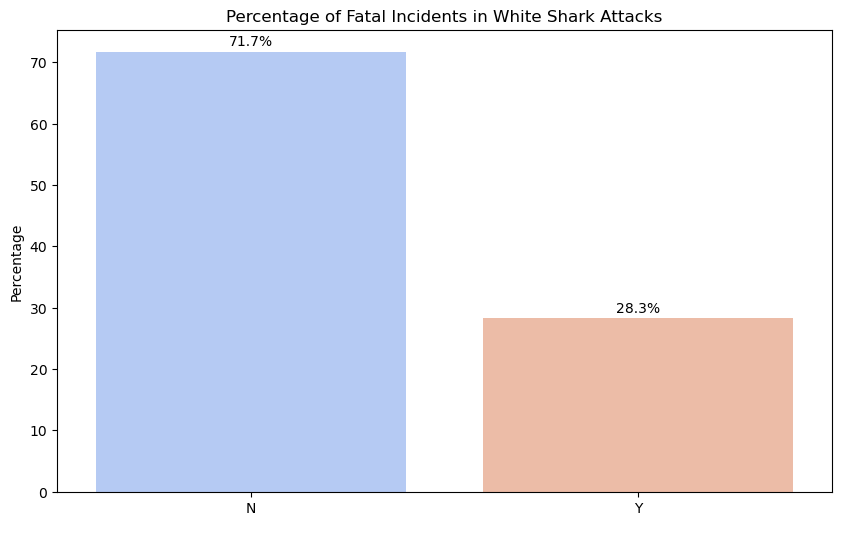

In [265]:

white_shark_data = shark_df[shark_df['Species'] == 'white shark']
fatal_incident_counts_percent = white_shark_data['fatal_incident'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=fatal_incident_counts_percent.index, y=fatal_incident_counts_percent.values, palette='coolwarm')
plt.title('Percentage of Fatal Incidents in White Shark Attacks')
plt.xlabel(' ')
plt.ylabel('Percentage')
for index, value in enumerate(fatal_incident_counts_percent.values):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center')
plt.show()



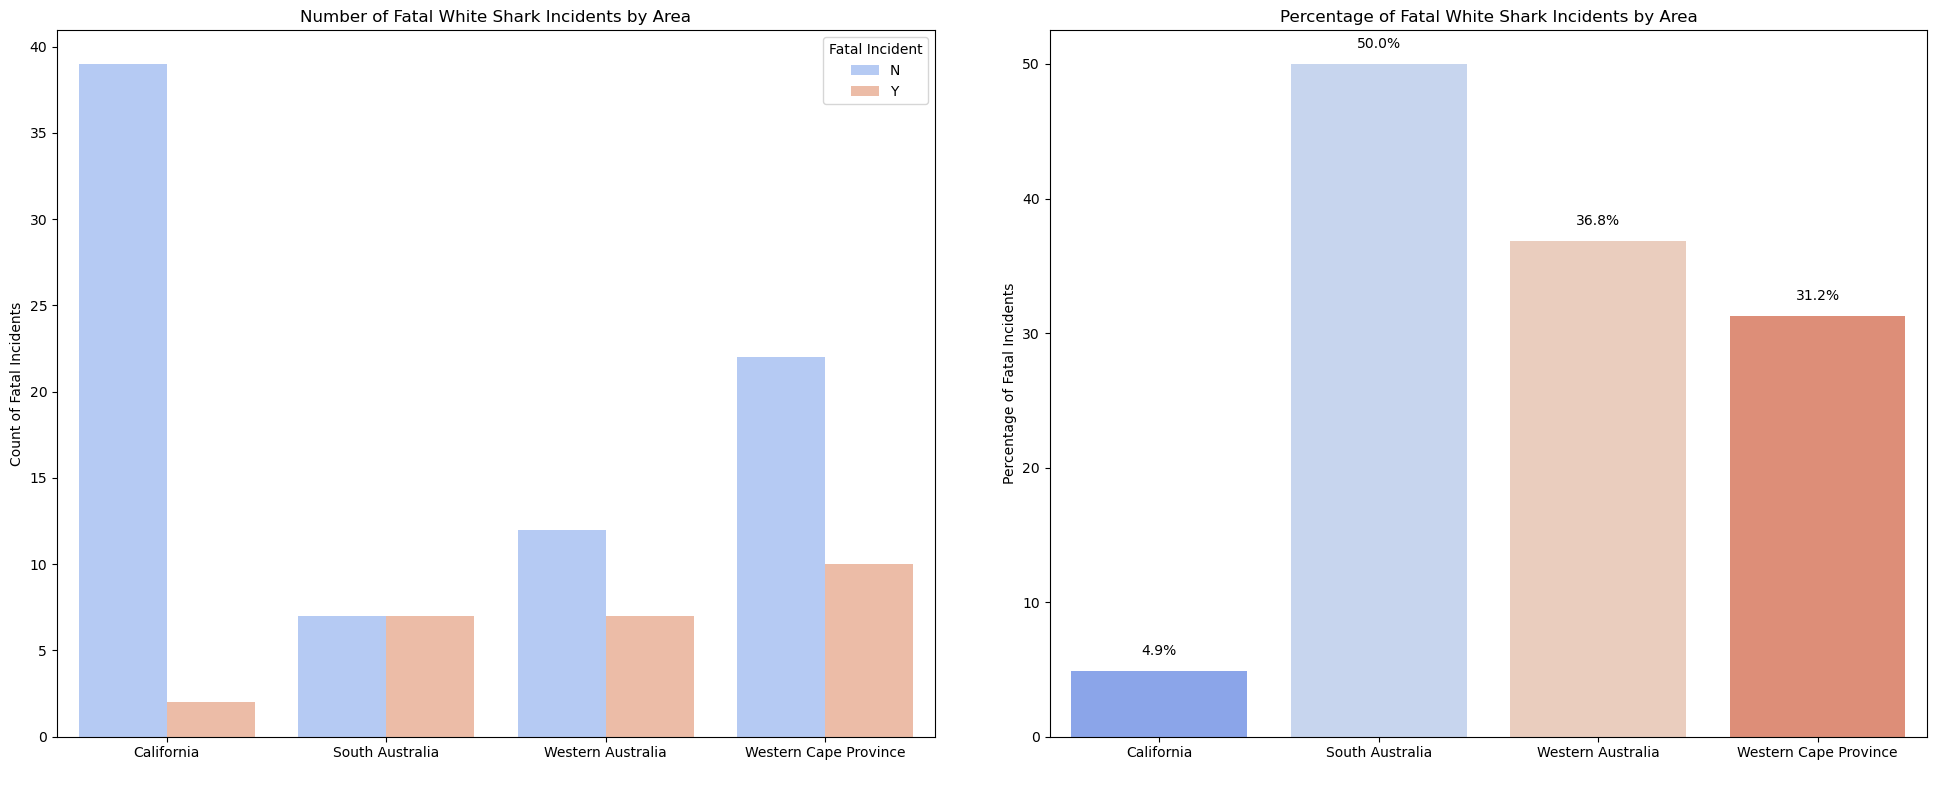

In [391]:

white_shark_data = shark_df[shark_df['Species'] == 'white shark']
area_counts = white_shark_data['Area'].value_counts()
areas_with_more_than_10_attacks = area_counts[area_counts > 10].index
filtered_white_shark_data = white_shark_data[white_shark_data['Area'].isin(areas_with_more_than_10_attacks)]
fatal_percentage_by_area = filtered_white_shark_data.groupby('Area')['fatal_incident'].value_counts(normalize=True).unstack()['Y'] * 100
sorted_areas = fatal_percentage_by_area.index


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.countplot(data=filtered_white_shark_data, x='Area', hue='fatal_incident', palette='coolwarm', ax=axes[0],order = sorted_areas)
axes[0].set_title('Number of Fatal White Shark Incidents by Area')
axes[0].set_xlabel(' ')
axes[0].set_ylabel('Count of Fatal Incidents')
axes[0].legend(title='Fatal Incident', loc='upper right')

sns.barplot(x=fatal_percentage_by_area.index, y=fatal_percentage_by_area.values, palette='coolwarm', ax=axes[1],order = sorted_areas)
axes[1].set_title('Percentage of Fatal White Shark Incidents by Area')
axes[1].set_xlabel(' ')
axes[1].set_ylabel('Percentage of Fatal Incidents')

for index, value in enumerate(fatal_percentage_by_area.values):
    axes[1].text(index, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)
   
plt.subplots_adjust(wspace=5)

plt.tight_layout()
plt.show()



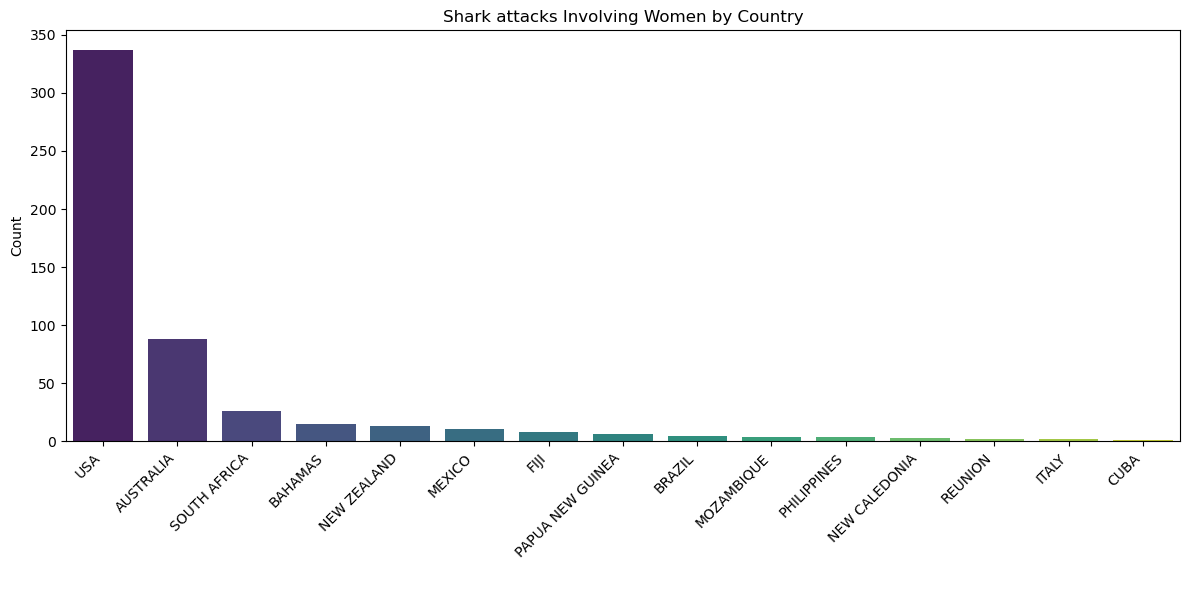

In [426]:

# סינון הנתונים עבור מקרים שבהם הנפגעת היא אישה ושבהם התקרית הייתה קטלנית
female_attacks = shark_df[(shark_df['Sex'] == 'F')]

# חישוב כמות המקרים הקטלניים עבור נשים בכל מדינה
attacks_counts_by_country = female_attacks['Top_Country'].value_counts()

# הצגת הנתונים בגרף
plt.figure(figsize=(12, 6))
sns.barplot(x=attacks_counts_by_country.index, y=attacks_counts_by_country.values, palette='viridis')
plt.title('Shark attacks Involving Women by Country')
plt.xlabel(' ')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


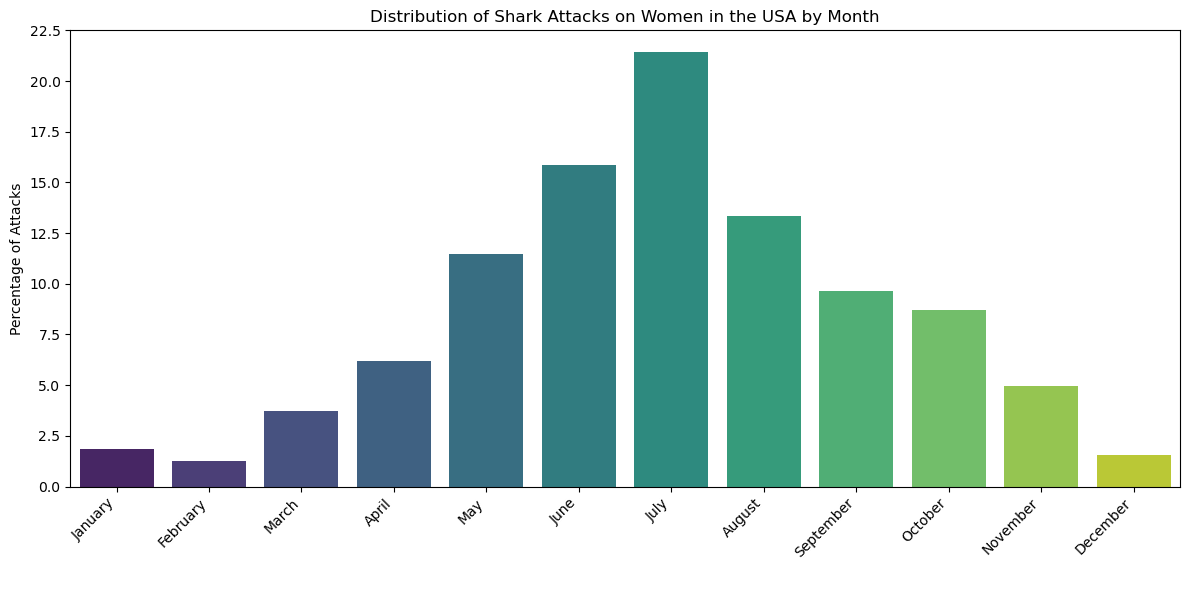

In [427]:

# סינון הנתונים עבור תקיפות בארה"ב שבהן הנפגעת היא אישה
female_attacks_usa = shark_df[(shark_df['Sex'] == 'F') & (shark_df['Top_Country'] == 'USA')]

# חישוב התפלגות החודשים עבור התקיפות הללו
month_counts = female_attacks_usa['Month'].value_counts(normalize=True).sort_index() * 100

# הצגת הנתונים בגרף
plt.figure(figsize=(12, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')
plt.title('Distribution of Shark Attacks on Women in the USA by Month')
plt.xlabel(' ')
plt.ylabel('Percentage of Attacks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


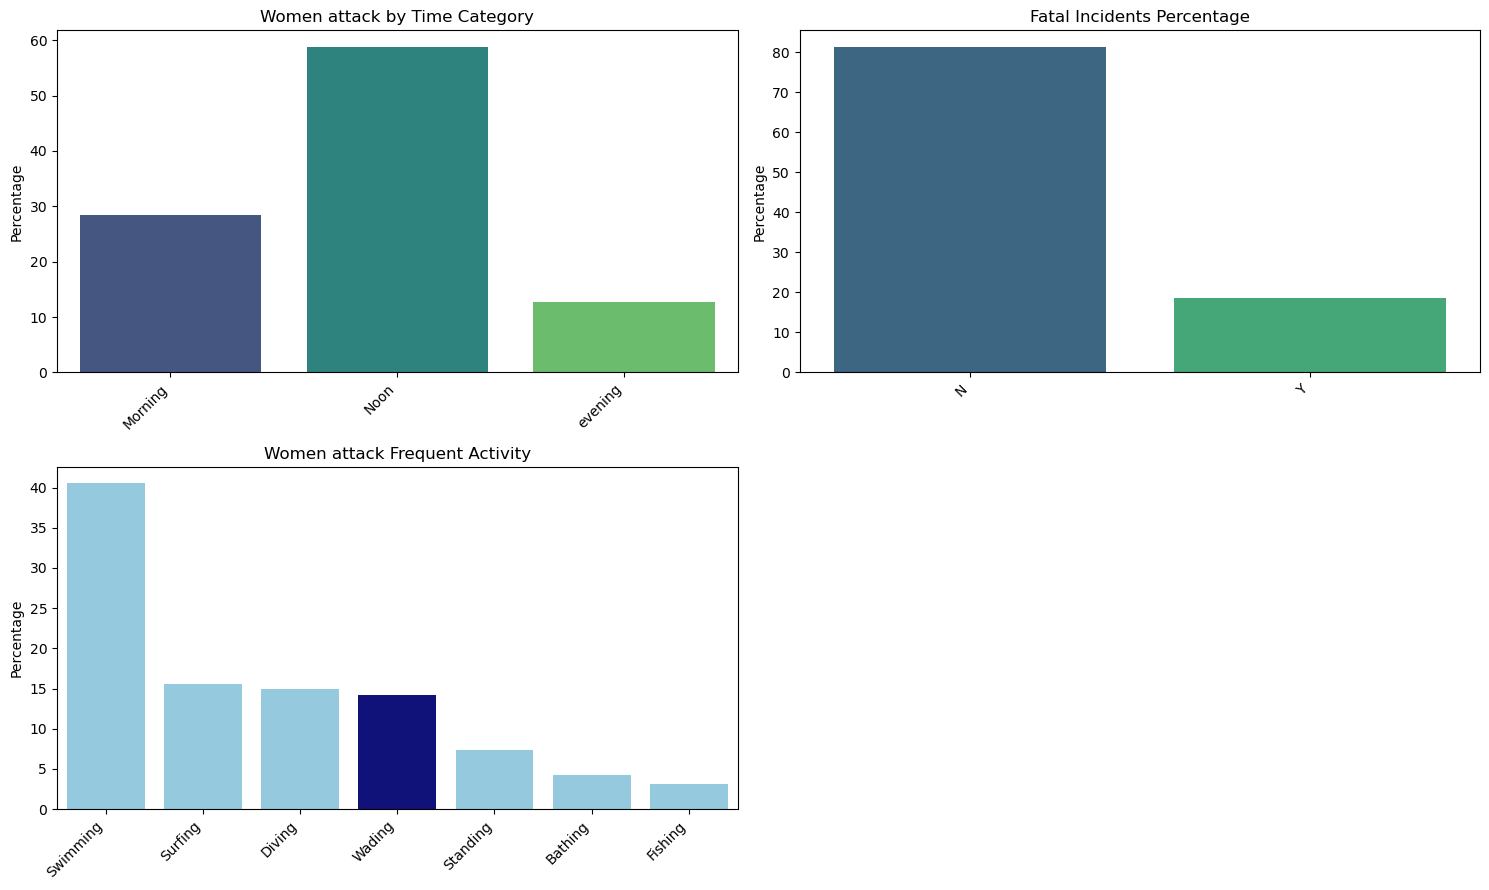

In [452]:
fig, ax = plt.subplots(2,2, figsize = (15,9))
plt.subplots_adjust(wspace = 0.3)


# גרף 1: התפלגות קטגוריות הזמן באחוזים
time_category_counts = female_attacks['Time_Category'].value_counts(normalize=True) * 100
sns.barplot(x=time_category_counts.index, y=time_category_counts.values, ax=ax[0, 0], palette='viridis')
ax[0, 0].set_xlabel('')
ax[0, 0].set_ylabel('Percentage')
ax[0, 0].set_title('Women attack by Time Category')

# גרף 2: אחוזי תקיפות קטלניות
fatal_counts = female_attacks['fatal_incident'].value_counts(normalize=True) * 100
sns.barplot(x=fatal_counts.index, y=fatal_counts.values, ax=ax[0, 1], palette='viridis')
ax[0, 1].set_xlabel('')
ax[0, 1].set_ylabel('Percentage')
ax[0, 1].set_title('Fatal Incidents Percentage')

# גרף 3: תדירות לפי פעילות באחוזים
activity_counts = female_attacks['Frequent_Activity'].value_counts(normalize=True) * 100
colors = ['darkblue' if activity == 'Wading' else 'skyblue' for activity in activity_counts.index]
sns.barplot(x=activity_counts.index, y=activity_counts.values, ax=ax[1, 0], palette=colors)
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel('Percentage')
ax[1, 0].set_title('Women attack Frequent Activity')

# הסרת גרף ריק
fig.delaxes(ax[1, 1])

# התאמת התוויות לציר ה-x
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45, ha='right')
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=45, ha='right')
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

#ax is a variable that put the histogram in each place , without it we see on histogram with all the data
#sns.histplot(data=titanic_df, x='age', stat='density', ax = ax[1,1])

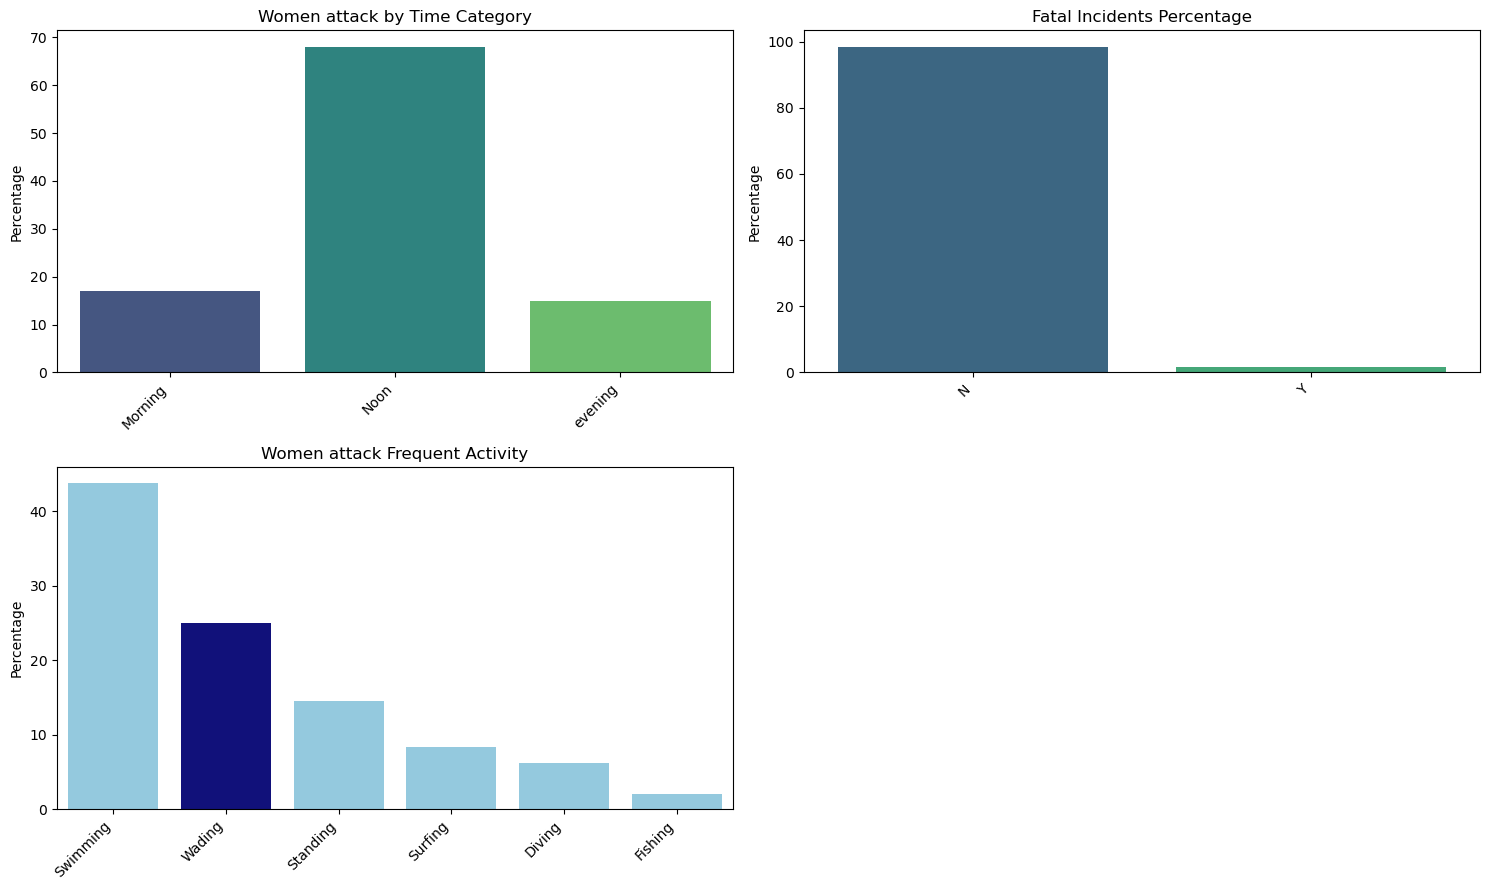

In [453]:
female_attacks_usa_july = shark_df[(shark_df['Sex'] == 'F') & (shark_df['Top_Country'] == 'USA') &(shark_df['Month'] == 'July') ]
fig, ax = plt.subplots(2,2, figsize = (15,9))
plt.subplots_adjust(wspace = 0.3)


# גרף 1: התפלגות קטגוריות הזמן באחוזים
time_category_counts = female_attacks_usa_july['Time_Category'].value_counts(normalize=True) * 100
sns.barplot(x=time_category_counts.index, y=time_category_counts.values, ax=ax[0, 0], palette='viridis')
ax[0, 0].set_xlabel('')
ax[0, 0].set_ylabel('Percentage')
ax[0, 0].set_title('Women attack by Time Category')

# גרף 2: אחוזי תקיפות קטלניות
fatal_counts = female_attacks_usa_july['fatal_incident'].value_counts(normalize=True) * 100
sns.barplot(x=fatal_counts.index, y=fatal_counts.values, ax=ax[0, 1], palette='viridis')
ax[0, 1].set_xlabel('')
ax[0, 1].set_ylabel('Percentage')
ax[0, 1].set_title('Fatal Incidents Percentage')

# גרף 3: תדירות לפי פעילות באחוזים
activity_counts = female_attacks_usa_july['Frequent_Activity'].value_counts(normalize=True) * 100
colors = ['darkblue' if activity == 'Wading' else 'skyblue' for activity in activity_counts.index]
sns.barplot(x=activity_counts.index, y=activity_counts.values, ax=ax[1, 0], palette = colors)
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel('Percentage')
ax[1, 0].set_title('Women attack Frequent Activity')

# הסרת גרף ריק
fig.delaxes(ax[1, 1])

# התאמת התוויות לציר ה-x
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45, ha='right')
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=45, ha='right')
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

<Axes: xlabel='Area', ylabel='count'>

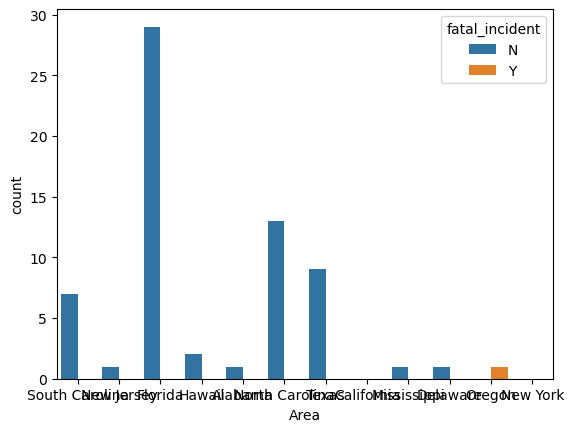

In [454]:
sns.countplot(data = female_attacks_usa_july,x = 'Area' , hue = 'fatal_incident')